Blatt 3 - Programmieraufgaben

Aufgabe 1)
b)

Aus dem Skript erhalten wir die Formel zur experimentellen Berechnung:

$x \bigoplus y = x für |y| \leq \ \frac{|x|}{b}eps$

Wir setzen x=1 und b=2, da wir mit dem Binärsystem arbeiten

In [154]:
import numpy as np
import math
import matplotlib.pyplot as plt

y = 1.0
x = 1.0

#Die Schleife läuft so lange, bis y+x=1
while y + x > 1:
    y /=2
#Da ab einem y von 1/2 eps x+y=x gilt und wir dieses y gerade berechnet haben gilt:
eps = 2*y
print(eps)

2.220446049250313e-16


Aufgabe 4)

Newton-Darstellung:

p(x)=$\sum_{i=0}^{n} y[x_{0},...,x_{n}] N_{i}(x)$

a)
Die zu berechnenden Koeffizienten $C_{i}$ sind hierbei demenstprechend die dividierten Differenzen $y[x_{0},...,x_{n}]$

Diese sind rekursiv definiert als:

$i=0,...,n: y[x_{i}]:=y_{i}$

$k=1,...,n-1: y[x_{i},...,x_{i+k}] := \frac {y[x_{i+1},...,x_{i+k}]-y[x_{i},...,x_{i+k-1}]} {x_{i+k}-x_{i}}$

In [155]:
#Stützstellen
# x=np.array([0,1,2,3])
# y=np.array([-6,2,1,3])
x=np.array([-1,0,1,3])
y=np.array([1,3,-7,3])

def NewtonCoeff(x,y):
    c = np.zeros(len(x))

    for i in range(len(x)):
        c[i] = y[i]  # c0 = y0

        for j in range(i):
            c[i] = (c[i]-c[j])/(x[i]-x[j]) 

    return c

c=NewtonCoeff(x,y)
print(c)

[ 1.    2.   -6.    2.75]


b)

Um die Newton Darstellung auszuwerten, brauchen wir neben unseren oben berechneten Koeffizienten auch die Newton-Basispolynome $N_{i}(x)$
Diese werden folgenderweise Berechnet:

$N_{0}(x)=1$

$N_{i}(x):= \prod_{j=0}^{i-1} (x-x_{j}) : i=1,..,n$

In [156]:
#z=np.array([0,0.5,1,1.5,2,2.5,3,3.5])
z=np.array([0,1,2])


def calcNewtonBP(j,z,x): #Berechnung des Newton Basispolynoms N_j
    nx=1
    for i in range(0,j):
        nx *= (z-x[i])
    return nx

def evalNewtonCoeff(c,x,z):
    p=np.zeros(len(z))
    for i in range(0,len(z)):
        #Werte für p_i berechnen
        p[i]= c[0] #mit c0 anfangen, da für N_0 = c0
        for j in range(1,len(x)): #für alle anderen c_i,...,c_n
            p[i] += c[j]*calcNewtonBP(j,z[i],x)
    return p

p=evalNewtonCoeff(c,x,z)

#p expected:
#3, -7, -12.5
print(p)



[  3.   -7.  -12.5]


c)




In [157]:
def createX(a,b,n):
    x = np.zeros(n)
    for i in range(n):
        x[i] = a + i/n*(b-a)
    return x

def buildPlot(a,b,f):
    z = np.linspace(a,b,100)

    x5=createX(a,b,5)
    y5=f(x5)

    x11=createX(a,b,11)
    y11=f(x11)

    x14=createX(a,b,14)
    y14=f(x14)

    c5=NewtonCoeff(x5,y5)
    c11=NewtonCoeff(x11,y11)
    c14=NewtonCoeff(x14,y14)

    p5=evalNewtonCoeff(c5,x5,z)
    p11=evalNewtonCoeff(c11,x11,z)
    p14=evalNewtonCoeff(c14,x14,z)

    plt.plot(z,p5,label="p5",linestyle="-.",color="red")
    plt.plot(z,p11,label="p11",linestyle="-",color="blue")
    plt.plot(z,p14,label="p14",linestyle="--",color="green")
    plt.legend()
    plt.show()


a)
$[a,b]=[0,2\pi], f(x)=\sin(x)$

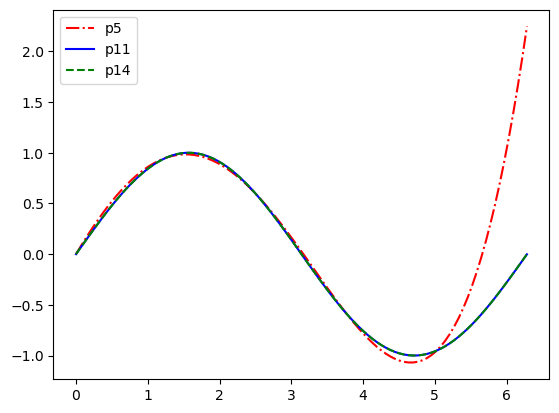

In [159]:
buildPlot(0,2*np.pi,np.sin)

b)
$[a,b]=[0,2], f(x)=\exp(x)$

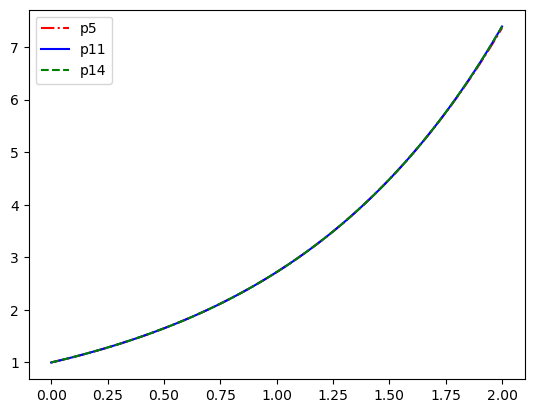

In [160]:
buildPlot(0,2,np.exp)

c)
$[a,b]=[-1,1], f(x)=\frac{1}{1+(5x)^{2}}$

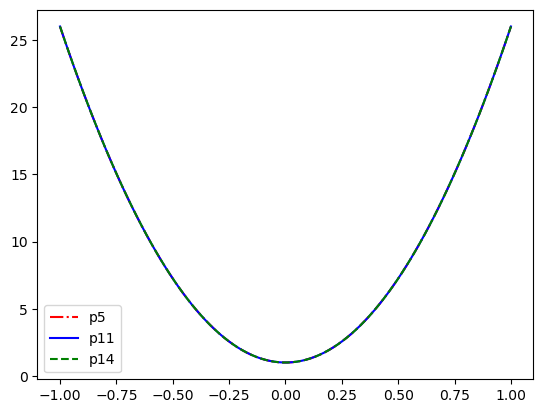

In [161]:
def my_f(x):
    return 1/1+(5*x)**2

buildPlot(-1,1,my_f)